In [1]:
print("第一部分：数据爬取")

第一部分：数据爬取


In [2]:
import selenium.webdriver as wb

In [3]:
import time

In [4]:
import numpy as np

In [5]:
import csv

In [6]:
import re

In [7]:
def init_csv(filepath='test.csv'):
    headers=['up名称','会员等级','会员类别','关注数','粉丝数']
    with open(filepath,'w',newline='',encoding='utf-8')as f:
        f_csv=csv.writer(f)
        f_csv.writerow(headers)

In [8]:
def write_csv(filepath,datas):
    with open(filepath,'a+',newline='',encoding='utf-8')as f:
        f_csv=csv.writer(f)
        f_csv.writerow(datas)

In [9]:
def read_uid(filepath):
    a=[]
    with open(filepath,'r',newline='',encoding='utf-8')as f:
        csv_read=csv.reader(f)
        for line in csv_read:
            line[0]=re.findall('\d+',line[0])[0]
            a.append(line[0])
    return a

In [10]:
class Spider(object):
    
    def __init__(self,display=True) ->None:
        super().__init__()
        option=wb.ChromeOptions()
        option.add_experimental_option(
            'excludeSwitches',['enable-logging'])
        if display==False:
            option.headless=True
            print('程序运行，设置为无窗口模式')
            
################    改Chrome程序地址 
        option.binary_location = r"C:\Users\hp\AppData\Local\Google\Chrome\Application\chrome.exe"
################    改Chrome驱动器地址
        try:
            self.driver=wb.Chrome(
                r"C:\Users\hp\chromedriver\chromedriver.exe", options=option )
        except:
            self.driver=wb.Chrome(
                r"C:\Users\Ludy_Lab\Desktop\workspace\assets\chromedriver.exe", options=option)
            
    def login(self):
        self.driver.get('https://space.bilibili.com/'+'51896064')
        self.random_sleep(2)
        login_elm=self.driver.find_element_by_css_selector(
             '#internationalHeader > div > div > div.nav-user-center > div.user-con.logout > div:nth-child(1) > div > span > div > span')
        login_elm.click()
        wds=self.driver.window_handles
        self.driver.switch_to.window(wds[-1])
        self.random_sleep(2)
        username_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-username')
        password_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-passwd')
        login2_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#geetest-wrap > div > div.btn-box > a.btn.btn-login')
            
################################
        #账号密码
        username_elm.send_keys('17868810645')
        password_elm.send_keys('zhuangqi7')
        self.random_sleep(1)
        login2_elm.click()
        # 10秒时间人机结合
        time.sleep(10)
        
    def random_sleep(self,delay=3):
        tmp=np.random.random()
        time.sleep(delay*(tmp+0.5))
        
    def fetch_by_UID(self,UID='51896064'):
        self.driver.get('https://space.bilibili.com/'+UID)
        self.random_sleep(3)
        
        up_name_elm=self.driver.find_element_by_css_selector('#h-name')
        print(up_name_elm.text)
        up_name=up_name_elm.text
        
        up_level_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-level.m-level')
        print(up_level_elm.get_attribute('lvl'))
        up_level = up_level_elm.get_attribute('lvl')

        up_member_elm = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-vipType')
        print(up_member_elm.text)
        up_member = up_member_elm.text

        up_follow_elm = self.driver.find_element_by_css_selector('#n-gz')
        print(up_follow_elm.text)
        up_follow = up_follow_elm.text

        up_followby_elm = self.driver.find_element_by_css_selector('#n-fs')
        print(up_followby_elm.text)
        up_followby = up_followby_elm.text

        up_getzan_elm = self.driver.find_element_by_css_selector('#n-bf')
        print(up_getzan_elm.text)
        up_getzan = up_getzan_elm.text

        up_numofplay_elm = self.driver.find_element_by_xpath(
            '/html/body/div[2]/div[2]/div/div[1]/div[3]/div[2]/p[2]')
        print(up_numofplay_elm.text)
        up_numofplay = up_numofplay_elm.text
        
        birthday='None'
        try:
            birthday=self.driver.find_element_by_css_selector(
                '#page-index > div.col-2 >div.section.user >div.info >div.content >div >div >div.item.birthday >span.text').text
        except:
            pass
        print(birthday)
        
        up_tougao_elm=self.driver.find_element_by_css_selector(
              '#navigator > div > div.n-inner.clearfix > div.n-tab-links > a.n-btn.n-video.n-audio.n-article.n-album > span.n-num').text 
        tougao=up_tougao_elm
        xiangbu='Error'
        try:
            up_tougao_elm=self.driver.find_element_by_xpath(
                 '//*[@id="navigator"]/div/div[1]/div[1]/a[3]/span[2]')
            up_tougao_elm.click()
            self.random_sleep(3)
            up_xiangbu_elm=self.driver.find_element_by_css_selector(
                   '#page-video > div > div.contribution-sidenav > div > div > ul > li:nth-child(4) > span')
            xiangbu=up_xiangbu_elm.text
        except:
            pass
        if xiangbu !='Error':
            tougo=str(int(tougao)-int(xiangbu))
        print(tougao)
        self.random_sleep(2)
        return(up_name,up_level,up_follow,up_followby,up_getzan,up_numofplay,birthday,tougao)

In [11]:
if __name__ =="__main__":
    csv_path = r'.\bilibli_ups2.csv'
    uid_path = r'.\UID100.csv'
    uid_list = read_uid(uid_path)
    worker = Spider(display=True) 
    try:
        worker.login()
    except:
        print('登录失败')
        time.sleep(10)
        exit()
        
    try:
        init_csv(csv_path)
    except:
        pass
    
    for i in range(len(uid_list)):
        try:
            write_csv(csv_path,worker.fetch_by_UID(uid_list[i]))
            print('*'*20+'\n',i,'success')
        except:
            print(i,'error')
    time.sleep(10)

登录失败
爱做饭的芋头SAMA
6

254
368.8万
0 error
啊吗粽
6
年度大会员
202
344.9万
1 error
79471674218_bili
0

3
0
2 error
波桑吃遍世界
6

117
139.5万
3 error
宝剑嫂
6
年度大会员
377
335.6万
4 error
长歌与小见见
6
年度大会员
77
208.1万
5 error
-纯黑-
6
年度大会员
0
326.6万
6 error
吃货请闭眼
6

68
177.2万
7 error
吃货明3
6
年度大会员
142
132.3万
8 error
潮汕好男人
6
年度大会员
165
160.8万
9 error
嘟督不噶油
6
年度大会员
162
283.3万
10 error
逗川kshadow
6
年度大会员
56
169.6万
11 error
东尼ookii
6
年度大会员
151
346.8万
12 error
电影最TOP
6

23
339.3万
13 error
盗月社食遇记
6
年度大会员
417
453.3万
14 error
倒悬的橘子
6
年度大会员
749
156.6万
15 error
大祥哥来了
6
年度大会员
106
451.5万
16 error
丰兄来了
6
年度大会员
279
154.8万
17 error
芳斯塔芙
6
年度大会员
73
176.6万
18 error
泛式
6
年度大会员
373
346万
19 error
孤独的美食基
6
年度大会员
116
325.2万
20 error
尕丶天堂
6
年度大会员
184
137.4万
21 error
花少北丶
6
年度大会员
45
507.4万
22 error
花花与三猫CatLive
6
年度大会员
340
317.7万
23 error
黑桐谷歌
6
年度大会员
198
231万
24 error
黑椒墨鱼
6
年度大会员
23
141.4万
25 error
还有一天就放假了
6
年度大会员
111
171.6万
26 error
槐安遗梦
6
年度大会员
86
112.3万
27 error
ilem
6
年度大会员
90
147.3万
28 error
敬汉卿
6
年度大会员
77
905.7万
29 error
杰里德Jared
6

38


In [1]:
print("第二部分：数据处理")

第二部分：数据处理


In [2]:
import pandas as pd

In [3]:
file=pd.read_excel('Desktop\_bai_da.xlsx')

In [4]:
file

,up名称,会员等级,会员类别,关注数,粉丝数
0,爱做饭的芋头SAMA,6,年度大会员,254,368.9万
1,啊吗粽,6,NaN,202,344.8万
2,79471674218_bili,0,NaN,3,0
3,波桑吃遍世界,6,NaN,117,139.6万
4,宝剑嫂,6,年度大会员,377,335.5万
...,...,...,...,...,...
94,=咬人猫=,6,年度大会员,31,341.9万
95,朱一旦的枯燥生活,6,年度大会员,49,478.8万
96,周六野Zoey,6,NaN,29,743万
97,中国BOY超级大猩猩,6,年度大会员,68,681.8万


In [5]:
file.head()

,up名称,会员等级,会员类别,关注数,粉丝数
0,爱做饭的芋头SAMA,6,年度大会员,254,368.9万
1,啊吗粽,6,NaN,202,344.8万
2,79471674218_bili,0,NaN,3,0
3,波桑吃遍世界,6,NaN,117,139.6万
4,宝剑嫂,6,年度大会员,377,335.5万


In [6]:
file.tail()

,up名称,会员等级,会员类别,关注数,粉丝数
94,=咬人猫=,6,年度大会员,31,341.9万
95,朱一旦的枯燥生活,6,年度大会员,49,478.8万
96,周六野Zoey,6,NaN,29,743万
97,中国BOY超级大猩猩,6,年度大会员,68,681.8万
98,zettaranc,6,年度大会员,75,184万


In [7]:
file.index

RangeIndex(start=0, stop=99, step=1)

In [9]:
file.columns

Index(['up名称', '会员等级', '会员类别', '关注数', '粉丝数'], dtype='object')

In [11]:
file.describe()

,会员等级,关注数
count,99.000000,99.000000
mean,5.939394,140.323232
std,0.603023,131.182676
min,0.000000,0.000000
25%,6.000000,52.500000
50%,6.000000,104.000000
75%,6.000000,196.000000
max,6.000000,749.000000


In [12]:
file.sort_index()

,up名称,会员等级,会员类别,关注数,粉丝数
0,爱做饭的芋头SAMA,6,年度大会员,254,368.9万
1,啊吗粽,6,NaN,202,344.8万
2,79471674218_bili,0,NaN,3,0
3,波桑吃遍世界,6,NaN,117,139.6万
4,宝剑嫂,6,年度大会员,377,335.5万
...,...,...,...,...,...
94,=咬人猫=,6,年度大会员,31,341.9万
95,朱一旦的枯燥生活,6,年度大会员,49,478.8万
96,周六野Zoey,6,NaN,29,743万
97,中国BOY超级大猩猩,6,年度大会员,68,681.8万


In [15]:
file[['up名称','关注数','粉丝数']]

,up名称,关注数,粉丝数
0,爱做饭的芋头SAMA,254,368.9万
1,啊吗粽,202,344.8万
2,79471674218_bili,3,0
3,波桑吃遍世界,117,139.6万
4,宝剑嫂,377,335.5万
...,...,...,...
94,=咬人猫=,31,341.9万
95,朱一旦的枯燥生活,49,478.8万
96,周六野Zoey,29,743万
97,中国BOY超级大猩猩,68,681.8万


In [16]:
file[file['关注数']>=100]

,up名称,会员等级,会员类别,关注数,粉丝数
0,爱做饭的芋头SAMA,6,年度大会员,254,368.9万
1,啊吗粽,6,NaN,202,344.8万
3,波桑吃遍世界,6,NaN,117,139.6万
4,宝剑嫂,6,年度大会员,377,335.5万
8,潮汕好男人,6,年度大会员,165,160.8万
9,嘟督不噶油,6,年度大会员,162,282.5万
11,东尼ookii,6,年度大会员,151,346.6万
13,盗月社食遇记,6,年度大会员,416,452.7万
14,倒悬的橘子,6,年度大会员,749,154.2万
15,大祥哥来了,6,年度大会员,105,450.9万


In [25]:
file[file['关注数']>=200]

,up名称,会员等级,会员类别,关注数,粉丝数
0,爱做饭的芋头SAMA,6,年度大会员,254,368.9万
1,啊吗粽,6,NaN,202,344.8万
4,宝剑嫂,6,年度大会员,377,335.5万
13,盗月社食遇记,6,年度大会员,416,452.7万
14,倒悬的橘子,6,年度大会员,749,154.2万
16,丰兄来了,6,年度大会员,279,154.9万
18,泛式,6,年度大会员,373,345.8万
22,花花与三猫CatLive,6,年度大会员,340,317.5万
34,科技美学,6,年度大会员,240,345.4万
41,刘老师说电影,6,大会员,207,333.9万


In [27]:
file[file['关注数']>=300]

,up名称,会员等级,会员类别,关注数,粉丝数
4,宝剑嫂,6,年度大会员,377,335.5万
13,盗月社食遇记,6,年度大会员,416,452.7万
14,倒悬的橘子,6,年度大会员,749,154.2万
18,泛式,6,年度大会员,373,345.8万
22,花花与三猫CatLive,6,年度大会员,340,317.5万
44,力元君,6,年度大会员,340,277.6万
55,猫店,6,年度大会员,485,105.1万
82,-欣小萌-,6,年度大会员,302,284万
84,小可儿,6,年度大会员,679,131.7万


In [33]:
file=pd.read_excel('Desktop\_bai_da.xlsx')

In [34]:
file

,up名称,会员等级,会员类别,关注数,粉丝数（万）
0,爱做饭的芋头SAMA,6,年度大会员,254,368.9
1,啊吗粽,6,NaN,202,344.8
2,79471674218_bili,0,NaN,3,0.0
3,波桑吃遍世界,6,NaN,117,139.6
4,宝剑嫂,6,年度大会员,377,335.5
...,...,...,...,...,...
94,=咬人猫=,6,年度大会员,31,341.9
95,朱一旦的枯燥生活,6,年度大会员,49,478.8
96,周六野Zoey,6,NaN,29,743.0
97,中国BOY超级大猩猩,6,年度大会员,68,681.8


In [35]:
file[file['粉丝数（万）']>=200]

,up名称,会员等级,会员类别,关注数,粉丝数（万）
0,爱做饭的芋头SAMA,6,年度大会员,254,368.9
1,啊吗粽,6,NaN,202,344.8
4,宝剑嫂,6,年度大会员,377,335.5
5,长歌与小见见,6,年度大会员,77,208.1
6,-纯黑-,6,年度大会员,0,326.5
...,...,...,...,...,...
93,痒局长,6,年度大会员,47,259.8
94,=咬人猫=,6,年度大会员,31,341.9
95,朱一旦的枯燥生活,6,年度大会员,49,478.8
96,周六野Zoey,6,NaN,29,743.0


In [36]:
file[file['粉丝数（万）']>=500]

,up名称,会员等级,会员类别,关注数,粉丝数（万）
21,花少北丶,6,年度大会员,45,507.0
28,敬汉卿,6,年度大会员,77,905.7
30,记录生活的蛋黄派,6,年度大会员,118,528.6
32,机智的党妹,6,年度大会员,6,670.1
43,凉风Kaze,6,年度大会员,13,766.6
46,老师好我叫何同学,6,年度大会员,256,642.4
47,老番茄,6,年度大会员,1,1392.6
50,LexBurner,6,年度大会员,35,944.9
51,木鱼水心,6,年度大会员,55,576.6
52,某幻君,6,年度大会员,42,652.3


In [37]:
file[file['粉丝数（万）']>=1000]

,up名称,会员等级,会员类别,关注数,粉丝数（万）
47,老番茄,6,年度大会员,1,1392.6


In [38]:
file['粉丝数（万）']>=500

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96     True
97     True
98    False
Name: 粉丝数（万）, Length: 99, dtype: bool

In [39]:
file.mean()

会员等级        5.939394
关注数       140.323232
粉丝数（万）    331.654545
dtype: float64

In [40]:
print("第三部分：数据分析")

第三部分：数据分析


In [41]:
import matplotlib.pyplot as plt
import pandas as pd

<BarContainer object of 4 artists>

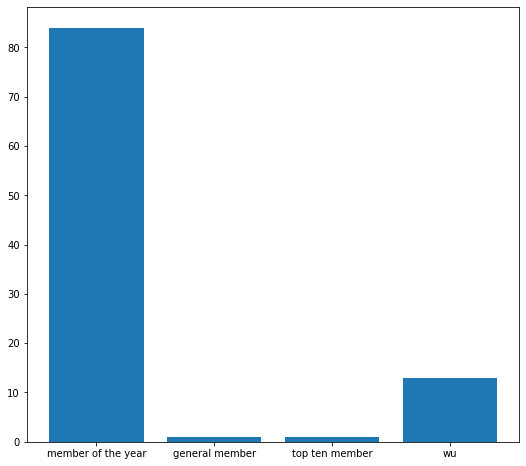

In [42]:
#会员等级情况
a=['member of the year','general member','top ten member','wu']
b=[84,1,1,13]
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.bar(a,b)

<BarContainer object of 9 artists>

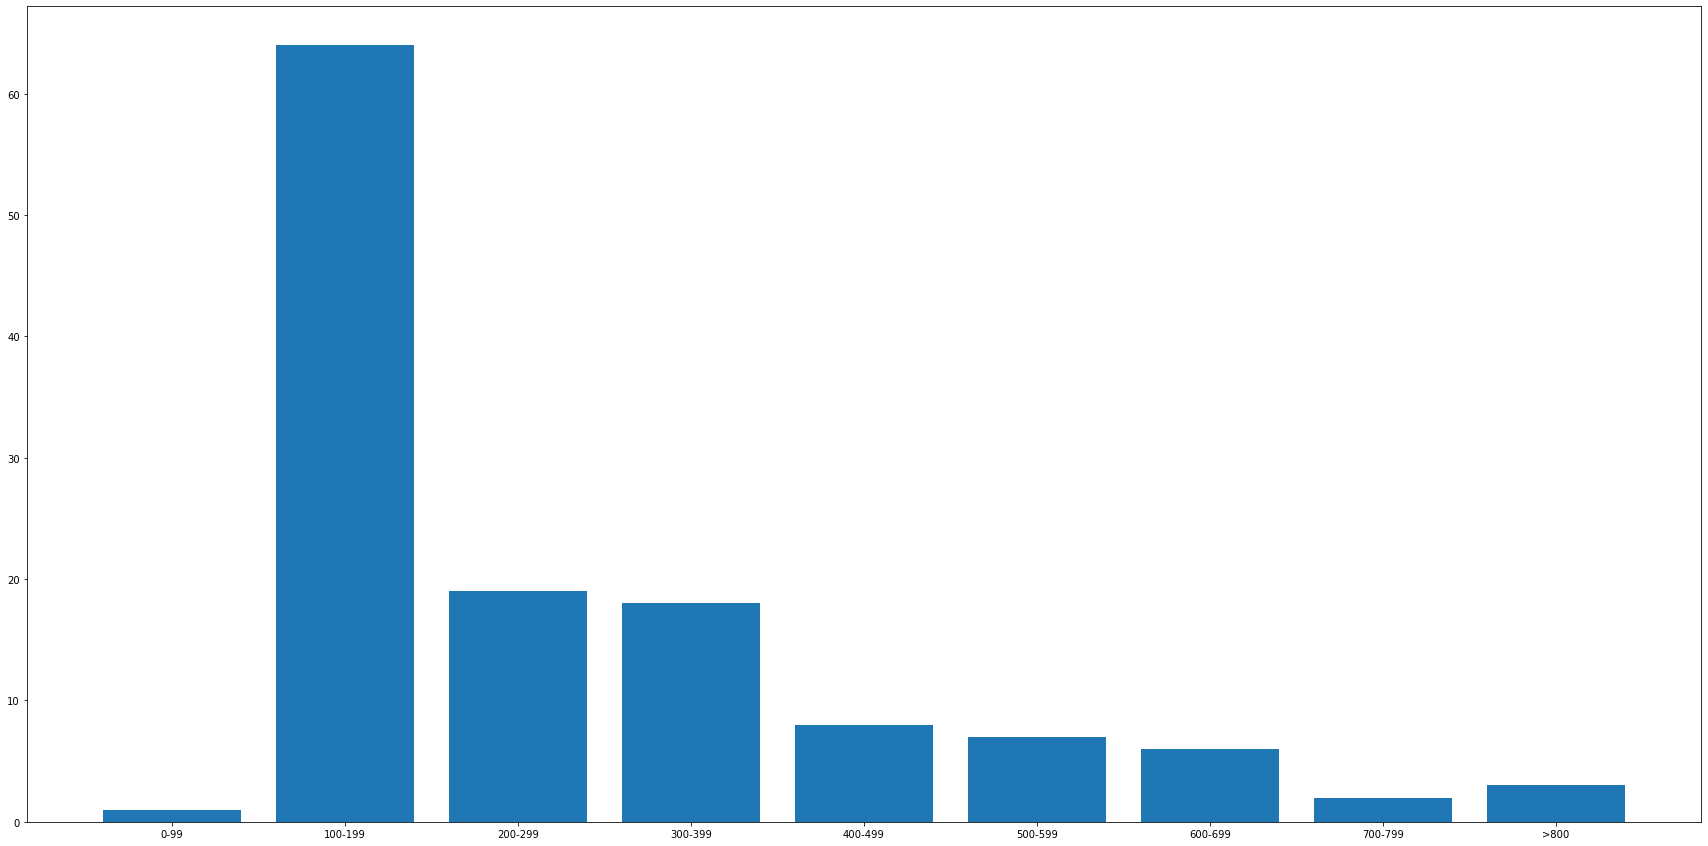

In [45]:
#粉丝数量分布情况
a=['0-99','100-199','200-299','300-399','400-499','500-599','600-699','700-799','>800']
b=[1,64,19,18,8,7,6,2,3]
plt.figure(figsize=(30,15))
plt.bar(a,b)

<BarContainer object of 6 artists>

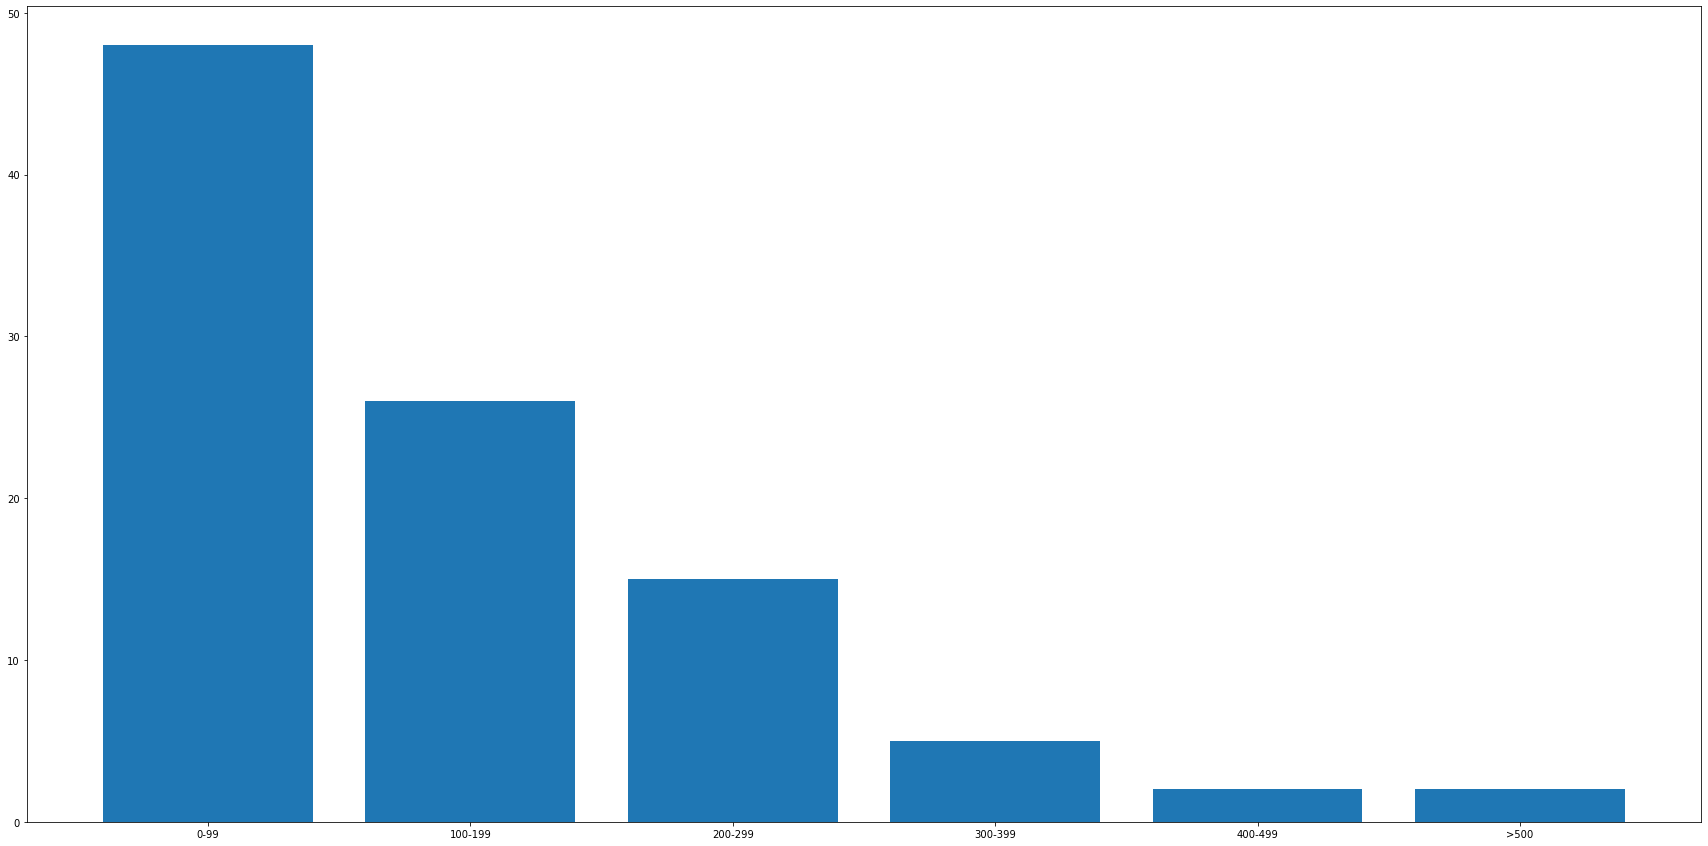

In [47]:
#关注数分布情况
a=['0-99','100-199','200-299','300-399','400-499','>500']
b=[48,26,15,5,2,2]
plt.figure(figsize=(30,15))
plt.bar(a,b)

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_excel('Desktop\_leibie.xlsx')

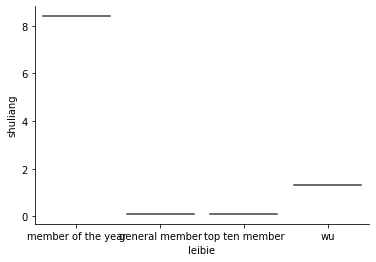

In [53]:
#会员等级情况
import seaborn as sns
sns.violinplot(df['leibie'], df['shuliang'])
sns.despine()

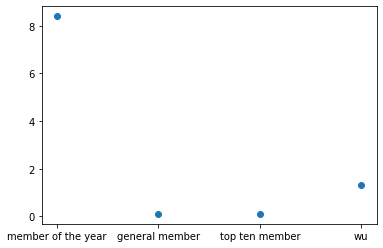

In [54]:
#会员等级情况
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(df['leibie'],df['shuliang'])
plt.show()

In [55]:
a=pd.read_excel('Desktop\_guanzhu.xlsx')

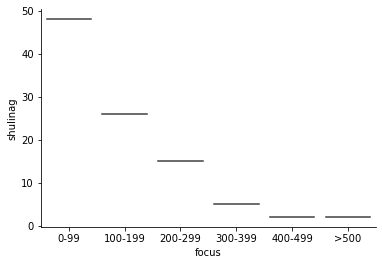

In [57]:
#关注数分布情况
import seaborn as sns
sns.violinplot(a['focus'],a['shulinag'])
sns.despine()

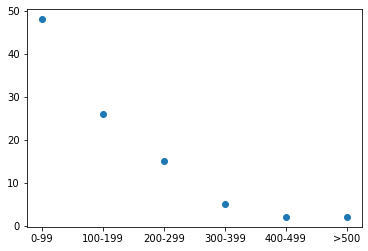

In [58]:
#关注数分布情况
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(a['focus'],a['shulinag'])
plt.show()

In [59]:
b=pd.read_excel('Desktop\_fensi.xlsx')

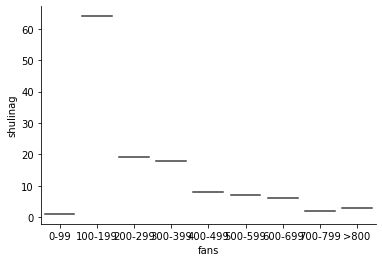

In [61]:
#粉丝数量分布情况
import seaborn as sns
sns.violinplot(b['fans'],b['shulinag'])
sns.despine()

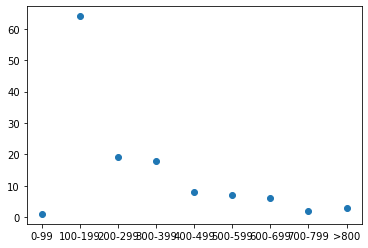

In [62]:
#粉丝数量分布情况
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(b['fans'],b['shulinag'])
plt.show()

In [63]:
#百大up主词云
filename="_2020up100.txt"
with open(filename,encoding='utf-8')as f:
    mytext=f.read()

In [64]:
print(mytext)

啊吗粽
阿幕降临
敖厂长
拜托了小翔哥
宝剑嫂
毕导THU
不正经老丝
才疏学浅的才浅
-纯黑-
大祥哥来了
盗月社食遇记
电影最TOP
东尼ookii
逗比的雀巢
EdmundDZhang
阿斗归来了
二喵的饭
泛式
芳斯塔芙
冯提莫
孤独的美食基
hanser
韩小四April
盒子酸奶
鹤吱菌
黄龄
黑猫厨房
红色激情
花少北丶
回形针PaperClip
机智的党妹
极速拍档
假美食po主
敬汉卿
卡特亚
靠脸吃饭的徐大王
靠谱电竞
科技美学
克里米亚野生动物园
LexBurner
蜡笔和小勋
老番茄
老师好我叫何同学
老坛胡说
力元君
历史调研室
凉风Kaze
泠鸢yousa
刘老师说电影
罗汉解说
罗翔说刑法
★⑥檤轮囬★
猛男舞团IconX
绵羊料理
某幻君
木鱼水心
纳豆奶奶
奶糕成精档案社
努力的Lorre
女胖胖
哦呼w
帕梅拉PamelaReif
瓶子君152
齐天大肾余潇洒
奇闻观察室
枪弹轨迹
上海滩许Van强
沈逸老师
渗透之C君
食贫道
水无月菌
特效小哥studio
兔叭咯
推背兔の
丸子叨叨叨
文不叮
文西与阿漆
我是郭杰瑞
逍遥散人
小艾大叔
小潮院长
小片片说大片
-欣小萌-
徐大虾咯
=咬人猫=
一只小仙若
伊丽莎白鼠
音乐制作人Kurt
影视飓风
硬核的半佛仙人
与山0v0
雨哥到处跑
远古时代装机猿
zettaranc
在下哲别
智能路障
中国BOY超级大猩猩
周六野Zoey
主厨农国栋
祖娅纳惜



In [65]:
import jieba
mytext=" ".join(jieba.cut(mytext))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hp\AppData\Local\Temp\jieba.cache
Loading model cost 1.679 seconds.
Prefix dict has been built successfully.


In [66]:
print(mytext)

啊 吗 粽 
 阿幕 降临 
 敖 厂长 
 拜托 了 小翔哥 
 宝剑 嫂 
 毕导 THU 
 不正经 老丝 
 才疏学浅 的 才 浅 
 - 纯黑 - 
 大祥 哥来 了 
 盗 月 社食 遇记 
 电影 最 TOP 
 东尼 ookii 
 逗比 的 雀巢 
 EdmundDZhang 
 阿斗 归来 了 
 二 喵 的 饭 
 泛式 
 芳 斯塔 芙 
 冯提 莫 
 孤独 的 美食 基 
 hanser 
 韩小四 April 
 盒子 酸奶 
 鹤吱菌 
 黄龄 
 黑猫 厨房 
 红色 激情 
 花少北 丶 
 回形针 PaperClip 
 机智 的 党妹 
 极速 拍档 
 假 美食 po 主 
 敬汉卿 
 卡特 亚 
 靠 脸 吃饭 的 徐 大王 
 靠 谱 电 竞 
 科技 美学 
 克里米亚 野生 动物园 
 LexBurner 
 蜡笔 和 小勋 
 老 番茄 
 老师 好 我 叫何 同学 
 老坛 胡说 
 力元君 
 历史 调研室 
 凉风 Kaze 
 泠 鸢 yousa 
 刘老师 说 电影 
 罗汉 解说 
 罗翔 说 刑法 
 ★ ⑥ 檤 轮 囬 ★ 
 猛男 舞团 IconX 
 绵羊 料理 
 某幻君 
 木鱼 水心 
 纳豆 奶奶 
 奶糕 成精 档案 社 
 努力 的 Lorre 
 女 胖胖 
 哦 呼 w 
 帕梅拉 PamelaReif 
 瓶子 君 152 
 齐天大 肾余 潇洒 
 奇闻 观察室 
 枪弹 轨迹 
 上海滩 许 Van 强 
 沈逸 老师 
 渗透 之 C 君 
 食 贫道 
 水无月菌 
 特效 小哥 studio 
 兔叭 咯 
 推背 兔 の 
 丸子 叨叨 叨 
 文不 叮 
 文西 与 阿漆 
 我 是 郭 杰瑞 
 逍遥散 人 
 小艾 大叔 
 小潮 院长 
 小 片片 说 大片 
 - 欣小萌 - 
 徐 大虾 咯 
 = 咬人 猫 = 
 一只 小仙 若 
 伊丽莎白 鼠 
 音乐 制作 人 Kurt 
 影视 飓风 
 硬核 的 半佛 仙人 
 与 山 0v0 
 雨哥 到处跑 
 远古时代 装机 猿 
 zettaranc 
 在 下 哲别 
 智能 路障 
 中国 BOY 超级 大猩猩 
 周六 野 Zoey 
 主厨 农国栋 
 祖娅 纳惜 



Populating the interactive namespace from numpy and matplotlib


C:\Users\hp\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(-0.5, 399.5, 199.5, -0.5)

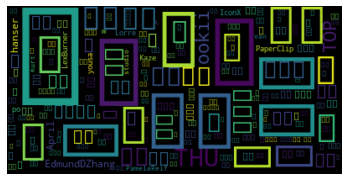

In [67]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(mytext)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

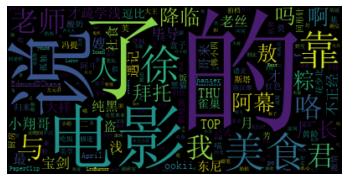

In [68]:
from wordcloud import WordCloud
wordcloud=WordCloud(font_path="simsun.ttf").generate(mytext)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")